## Section B


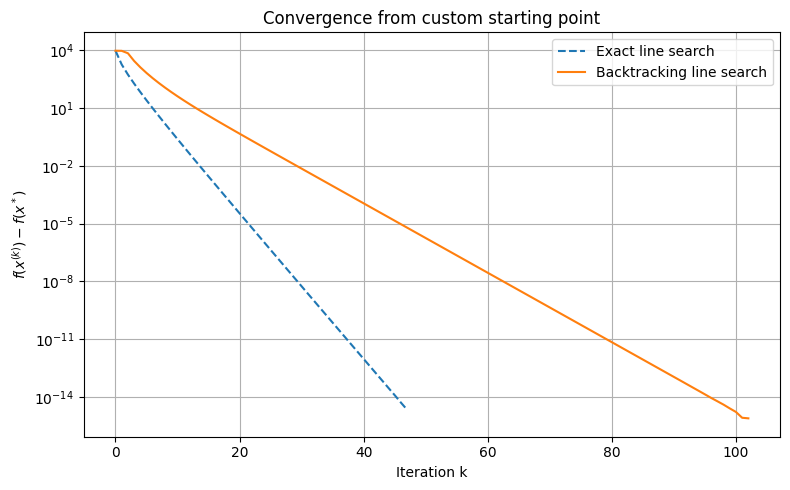

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# ----- Helper Functions -----
def generate_spd_matrix(n):
    A = np.random.randn(n, n)
    return A.T @ A + n * np.eye(n)

def objective(Q, q, x):
    return 0.5 * x.T @ Q @ x + q.T @ x

def exact_line_search(Q, q, x, grad):
    return (grad @ grad) / (grad @ Q @ grad)

def backtracking_line_search(Q, q, x, grad, alpha=1.0, beta=0.8, c=1e-4):
    fx = objective(Q, q, x)
    while True:
        x_new = x - alpha * grad
        fx_new = objective(Q, q, x_new)
        if fx_new <= fx - c * alpha * np.dot(grad, grad):
            break
        alpha *= beta
    return alpha

def gradient_descent(Q, q, x0, x_star, method='exact', tol=1e-6, max_iter=200):
    x = x0.copy()
    errors = []

    for _ in range(max_iter):
        grad = Q @ x + q
        fx = objective(Q, q, x)
        fx_star = objective(Q, q, x_star)
        errors.append(fx - fx_star)

        if np.linalg.norm(grad) < tol:
            break

        if method == 'exact':
            alpha = exact_line_search(Q, q, x, grad)
        elif method == 'backtracking':
            alpha = backtracking_line_search(Q, q, x, grad)
        else:
            raise ValueError("Unknown method")

        x -= alpha * grad

    return x, errors

# ----- Main Execution Block -----
def run_experiment(x0):
    n = len(x0)
    Q = generate_spd_matrix(n)
    q = np.random.randn(n)
    x_star = -np.linalg.solve(Q, q)

    _, errors_exact = gradient_descent(Q, q, x0, x_star, method='exact')
    _, errors_bt = gradient_descent(Q, q, x0, x_star, method='backtracking')

    # Plot
    plt.figure(figsize=(8, 5))
    plt.semilogy(errors_exact, label='Exact line search', linestyle='--')
    plt.semilogy(errors_bt, label='Backtracking line search', linestyle='-')
    plt.xlabel('Iteration k')
    plt.ylabel(r'$f(x^{(k)}) - f(x^*)$')
    plt.title(f'Convergence from custom starting point')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# ----- Example usage -----
# Define your custom starting point here
x0_custom = np.random.randn(100)  # or specify manually like: np.array([1.0, 2.0, ...])
run_experiment(x0_custom)


## Section C

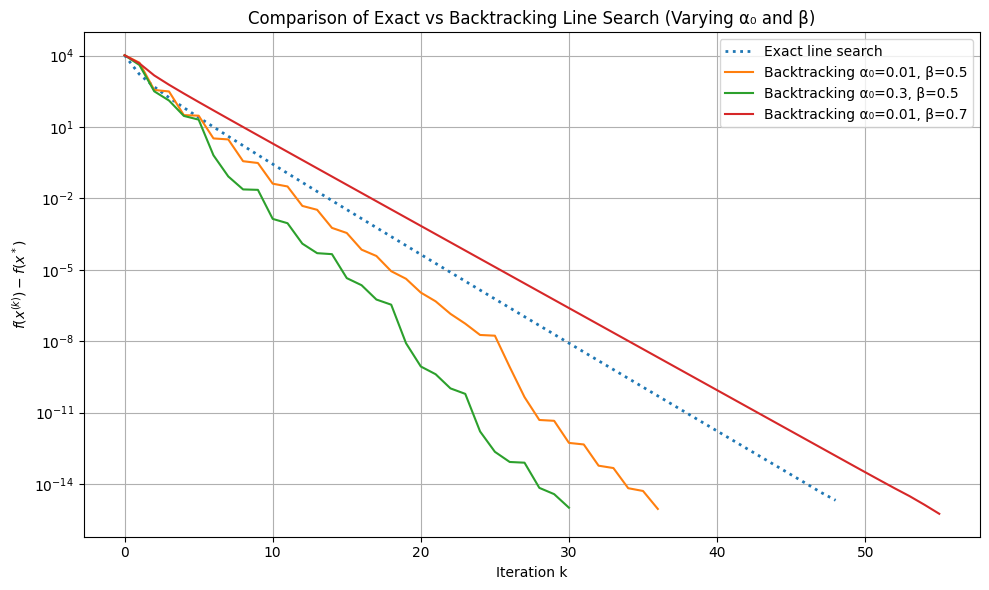

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------- Helper Functions ----------------

def generate_spd_matrix(n):
    """Generate a symmetric positive definite matrix Q."""
    A = np.random.randn(n, n)
    return A.T @ A + n * np.eye(n)

def objective(Q, q, x):
    """Quadratic objective function."""
    return 0.5 * x.T @ Q @ x + q.T @ x

def exact_line_search(Q, q, x, grad):
    """Compute exact step size for quadratic function."""
    return (grad @ grad) / (grad @ Q @ grad)

def gradient_descent(Q, q, x0, x_star, method='exact', tol=1e-6, max_iter=1000):
    """Gradient descent with exact line search."""
    x = x0.copy()
    errors = []

    for _ in range(max_iter):
        grad = Q @ x + q
        fx = objective(Q, q, x)
        fx_star = objective(Q, q, x_star)
        errors.append(fx - fx_star)

        if np.linalg.norm(grad) < tol:
            break

        if method == 'exact':
            alpha = exact_line_search(Q, q, x, grad)
        else:
            raise ValueError("Unknown method")

        x -= alpha * grad

    return x, errors

# ---------------- Backtracking Logic ----------------

def backtracking_with_params(Q, q, x, grad, alpha=1.0, beta=0.8, c=1e-4):
    """Backtracking line search with configurable alpha and beta."""
    fx = objective(Q, q, x)
    while True:
        x_new = x - alpha * grad
        fx_new = objective(Q, q, x_new)
        if fx_new <= fx - c * alpha * np.dot(grad, grad):
            break
        alpha *= beta
    return alpha

def gd_backtracking_custom(Q, q, x0, x_star, alpha0, beta, tol=1e-6, max_iter=200):
    """Gradient descent with customizable backtracking line search."""
    x = x0.copy()
    errors = []

    for _ in range(max_iter):
        grad = Q @ x + q
        fx = objective(Q, q, x)
        fx_star = objective(Q, q, x_star)
        errors.append(fx - fx_star)

        if np.linalg.norm(grad) < tol:
            break

        alpha = backtracking_with_params(Q, q, x, grad, alpha=alpha0, beta=beta)
        x -= alpha * grad

    return x, errors

# ---------------- Experiment Setup ----------------

alpha_beta_pairs = [(0.01, 0.5), (0.3, 0.5), (0.01, 0.7)]
results_bt_variants = {}

n = 100  # problem size
Q = generate_spd_matrix(n)
q = np.random.randn(n)
x_star = -np.linalg.solve(Q, q)
x0 = np.random.randn(n)

# Exact line search baseline
_, errors_exact = gradient_descent(Q, q, x0, x_star, method='exact')

# Run backtracking variants
for alpha0, beta in alpha_beta_pairs:
    _, errors_bt_custom = gd_backtracking_custom(Q, q, x0, x_star, alpha0, beta)
    results_bt_variants[(alpha0, beta)] = errors_bt_custom

# ---------------- Plotting ----------------

plt.figure(figsize=(10, 6))
plt.semilogy(errors_exact, label='Exact line search', linestyle=':', linewidth=2)

for (alpha0, beta), errors in results_bt_variants.items():
    label = f'Backtracking α₀={alpha0}, β={beta}'
    plt.semilogy(errors, label=label)

plt.xlabel('Iteration k')
plt.ylabel(r'$f(x^{(k)}) - f(x^*)$')
plt.title('Comparison of Exact vs Backtracking Line Search (Varying α₀ and β)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Section D  

Running for problem size n = 50


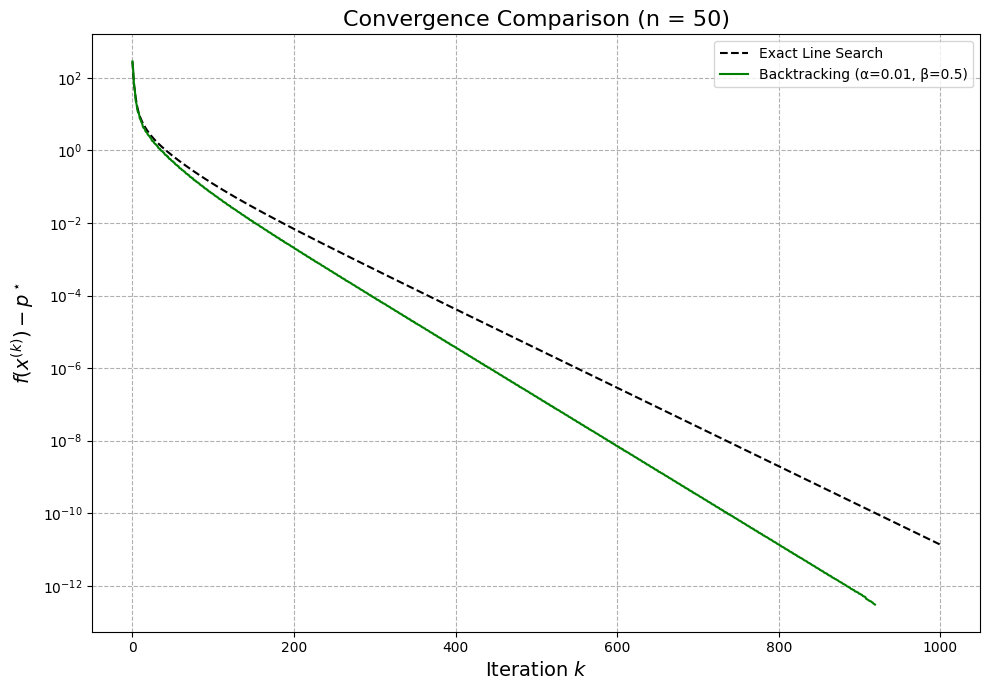

Running for problem size n = 100


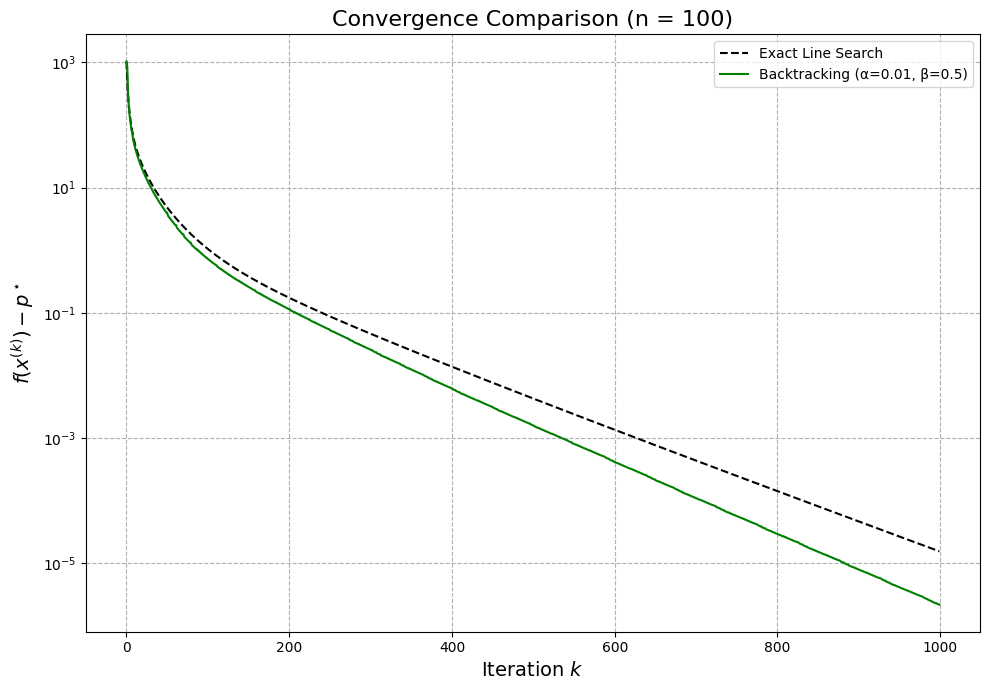

Running for problem size n = 200


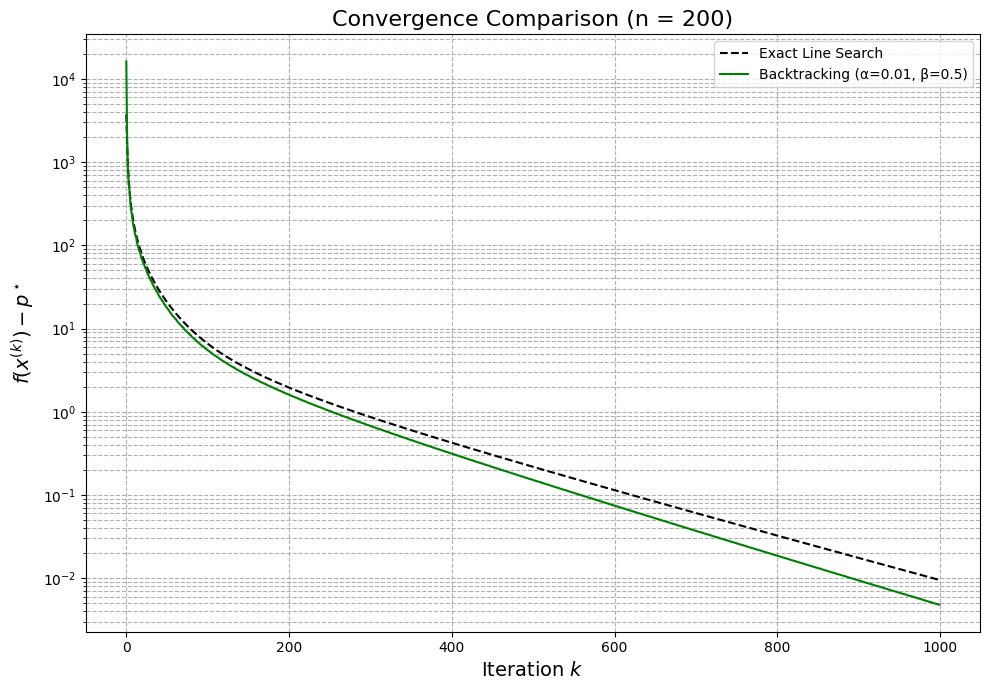

Running for problem size n = 500


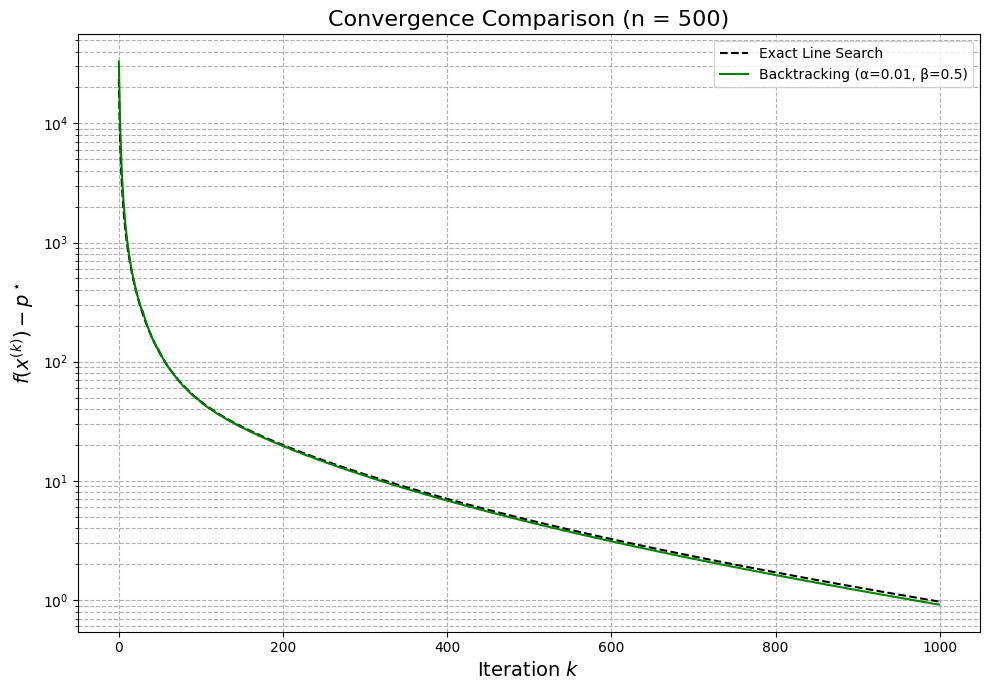

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# ---- Custom Quadratic Function ----
def objective_function(A, b, v):
    return 0.5 * v.T @ A @ v + b.T @ v

# ---- Exact Line Minimization ----
def descent_with_exact_step(A, b, start_vec, tolerance=1e-6, max_steps=1000):
    vec = start_vec
    error_log = []
    optimal_val = objective_function(A, b, -np.linalg.solve(A, b))
    for _ in range(max_steps):
        grad_vec = A @ vec + b
        step_length = (grad_vec.T @ grad_vec) / (grad_vec.T @ A @ grad_vec)
        updated_vec = vec - step_length * grad_vec
        error_log.append(objective_function(A, b, updated_vec) - optimal_val)
        if np.linalg.norm(grad_vec) < tolerance:
            break
        vec = updated_vec
    return vec, error_log

# ---- Conservative Backtracking ----
def descent_with_backtracking(A, b, start_vec, init_step=1.0, reduction=0.5, shrink=0.01, tolerance=1e-6, max_steps=1000):
    vec = start_vec
    error_log = []
    optimal_val = objective_function(A, b, -np.linalg.solve(A, b))
    for _ in range(max_steps):
        grad_vec = A @ vec + b
        direction = -grad_vec
        step = init_step
        while objective_function(A, b, vec + step * direction) > objective_function(A, b, vec) + shrink * step * grad_vec.T @ direction:
            step *= reduction
        updated_vec = vec + step * direction
        error_log.append(objective_function(A, b, updated_vec) - optimal_val)
        if np.linalg.norm(grad_vec) < tolerance:
            break
        vec = updated_vec
    return vec, error_log

# ---- Run tests for various dimensions ----
for dimension in [50, 100, 200, 500]:
    print(f"Running for problem size n = {dimension}")
    np.random.seed(0)
    A = np.random.randn(dimension, dimension)
    A = A.T @ A + np.eye(dimension)
    b = np.random.randn(dimension)
    init_vec = np.random.randn(dimension)

    # Execute both strategies
    _, exact_log = descent_with_exact_step(A, b, init_vec)
    _, backtrack_log = descent_with_backtracking(A, b, init_vec, init_step=1.0, reduction=0.5, shrink=0.01)

    # ---- Visualization ----
    plt.figure(figsize=(10, 7))
    plt.semilogy(exact_log, 'k--', label='Exact Line Search')
    plt.semilogy(backtrack_log, 'g-', label='Backtracking (α=0.01, β=0.5)')
    plt.xlabel('Iteration $k$', fontsize=14)
    plt.ylabel(r'$f(x^{(k)}) - p^\star$', fontsize=14)
    plt.title(f'Convergence Comparison (n = {dimension})', fontsize=16)
    plt.grid(True, which="both", ls="--")
    plt.legend()
    plt.tight_layout()
    plt.show()


## Section E

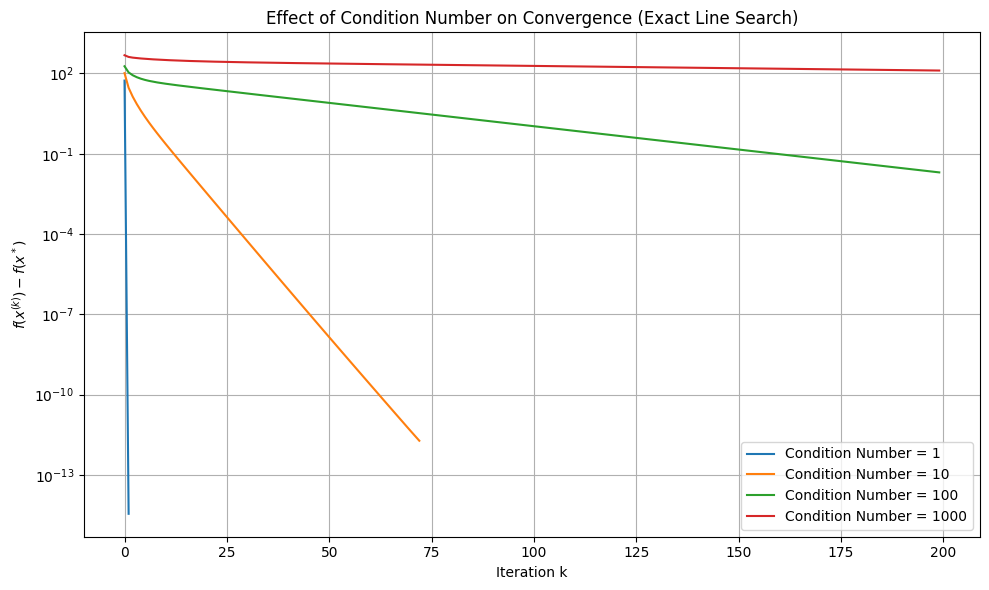

In [2]:
# Function to generate SPD matrix with controlled condition number
def generate_Q_with_condition_number(n, cond_number):
    U, _ = np.linalg.qr(np.random.randn(n, n))
    singular_values = np.linspace(1, 1/cond_number, n)
    D = np.diag(singular_values)
    return U @ D @ U.T

# Define condition numbers to test
condition_numbers = [1, 10, 100, 1000]
results_by_cond = {}
n = 50  # fixed problem size for comparison

# Run gradient descent for each condition number
for cond in condition_numbers:
    Q = generate_Q_with_condition_number(n, cond)
    q = np.random.randn(n)
    x_star = -np.linalg.solve(Q, q)
    x0 = np.random.randn(n)
    
    _, errors = gradient_descent(Q, q, x0, x_star, method='exact')
    results_by_cond[cond] = errors

# Plotting results
plt.figure(figsize=(10, 6))
for cond, errors in results_by_cond.items():
    plt.semilogy(errors, label=f'Condition Number = {cond}')

plt.xlabel('Iteration k')
plt.ylabel(r'$f(x^{(k)}) - f(x^*)$')
plt.title('Effect of Condition Number on Convergence (Exact Line Search)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Section F

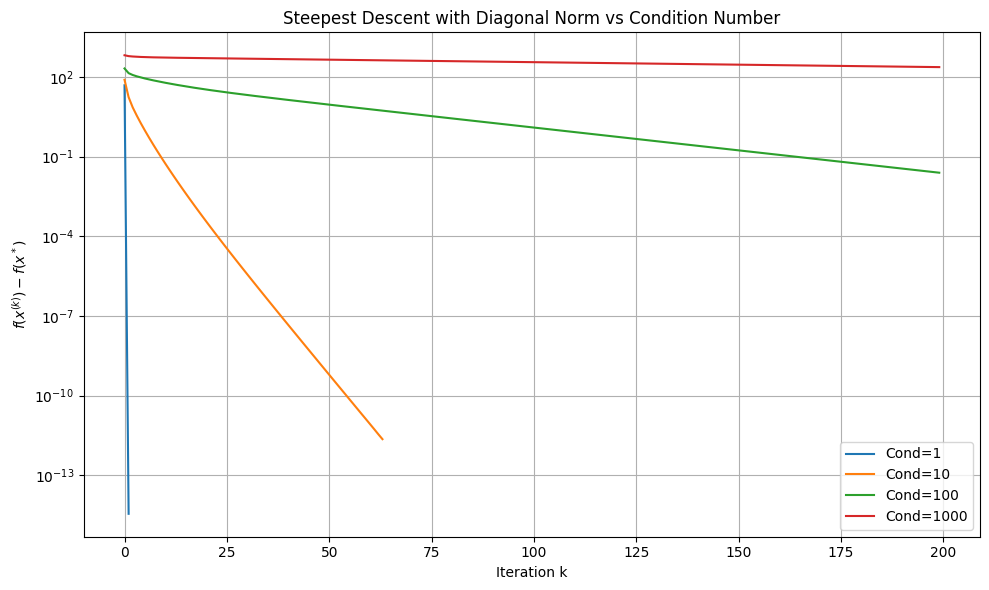

In [3]:
# Implement steepest descent using a P-norm where P = diag(Q)

def steepest_descent_diag_norm(Q, q, x0, x_star, tol=1e-6, max_iter=200):
    P_inv = np.diag(1.0 / np.diag(Q))  # P = diag(Q), so P_inv is diagonal too
    x = x0.copy()
    errors = []

    for _ in range(max_iter):
        grad = Q @ x + q
        fx = objective(Q, q, x)
        fx_star = objective(Q, q, x_star)
        errors.append(fx - fx_star)

        if np.linalg.norm(grad) < tol:
            break

        direction = -P_inv @ grad
        alpha = (grad @ P_inv @ grad) / (direction @ Q @ direction)
        x += alpha * direction

    return x, errors

# Run steepest descent with diagonal norm for different condition numbers
results_steepest_by_cond = {}
n = 50
x0 = np.random.randn(n)

for cond in condition_numbers:
    Q = generate_Q_with_condition_number(n, cond)
    q = np.random.randn(n)
    x_star = -np.linalg.solve(Q, q)

    _, errors_diag_norm = steepest_descent_diag_norm(Q, q, x0, x_star)
    results_steepest_by_cond[cond] = errors_diag_norm

# Plotting
plt.figure(figsize=(10, 6))
for cond, errors in results_steepest_by_cond.items():
    plt.semilogy(errors, label=f'Cond={cond}')

plt.xlabel('Iteration k')
plt.ylabel(r'$f(x^{(k)}) - f(x^*)$')
plt.title('Steepest Descent with Diagonal Norm vs Condition Number')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
